# Image clustering

This small dataset includes 80 photos of dogs (10), cats (10), family (20), alone (20), and food (20). All of the images are in color and have varying high and width sizes.

## Data

Of the 80 images the minimum image height is 324 pixels, the maximum image height is 640 pixels. The minimum width is 427 pixels and the maximum width is 640 pixels.

The histograms of the image size, height, and width are shown below.

In [44]:
from IPython.display import clear_output
%pip install kagglehub
%pip install ipywidgets
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install opencv-python
%pip install scikit-image
clear_output()

In [45]:
import kagglehub
import shutil
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from collections import defaultdict

Download the latest dataset.

In [5]:
# Download latest version
path = kagglehub.dataset_download("heavensky/image-dataset-for-unsupervised-clustering")
destination = r"data"
os.makedirs(destination, exist_ok=True)
for item in os.listdir(path):
    src = os.path.join(path, item)
    dest = os.path.join(destination, item)
    if os.path.isdir(src):
        shutil.copytree(src, dest, dirs_exist_ok=True)
    else:
        shutil.copy2(src, dest)

Get all image paths.

In [7]:
path_images = []
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        if filename.endswith('.jpg'):
            found_image = os.path.join(dirname, filename)
            path_images.append(found_image)
len_images = len(path_images)
print('Total Images : ', len_images)

Total Images :  80


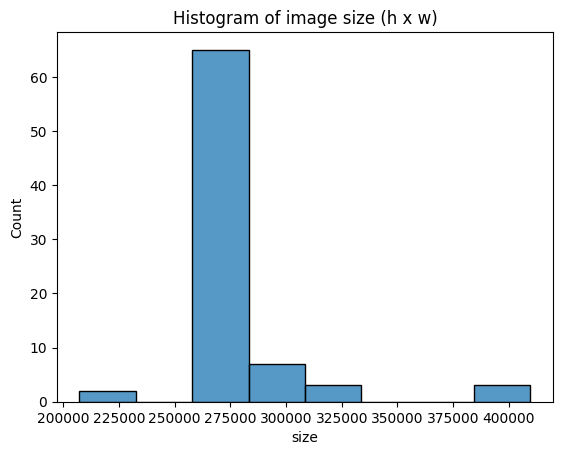

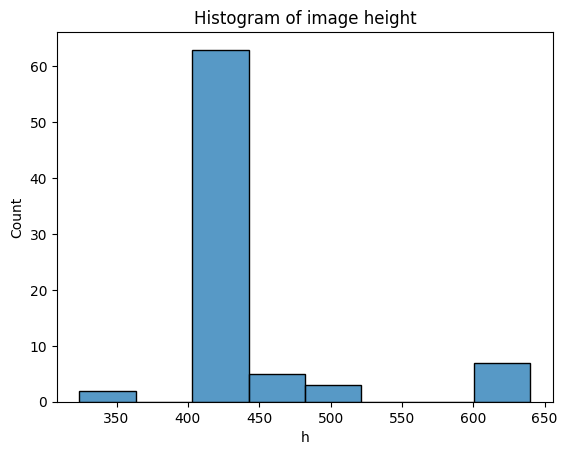

Text(0.5, 1.0, 'Histogram of image width')

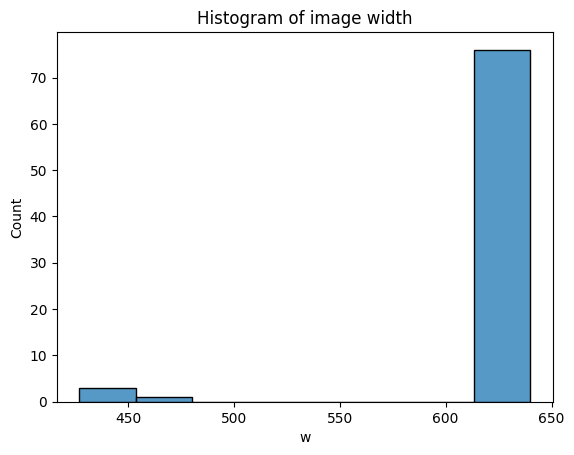

In [47]:
# Resizing the image to 640 x 640
images = []
image_sizes = defaultdict(list)
for i in range(len_images):
    read_image = imread(path_images[i])
    arr = np.array(read_image)
    h, w, d = arr.shape
    image_sizes["h"].append(h)
    image_sizes["w"].append(w)
    image_sizes["d"].append(d)
    img = resize(read_image, (640, 640))
    images.append(img)
image_sizes = pd.DataFrame(image_sizes)
image_sizes["size"] = image_sizes["h"] * image_sizes["w"]
sns.histplot(data=image_sizes, x="size")
plt.title("Histogram of image size (h x w)")
plt.show()
sns.histplot(data=image_sizes, x="h")
plt.title("Histogram of image height")
plt.show()
sns.histplot(data=image_sizes, x="w")
plt.title("Histogram of image width")

In [30]:
image_sizes.describe()

,h,w,d
count,80.000000,80.000000,80.0
mean,447.325000,630.325000,3.0
std,61.527965,42.722767,0.0
min,324.000000,427.000000,3.0
25%,427.000000,640.000000,3.0
50%,427.000000,640.000000,3.0
75%,427.000000,640.000000,3.0
max,640.000000,640.000000,3.0


Sample of images in the dataset are shown below.

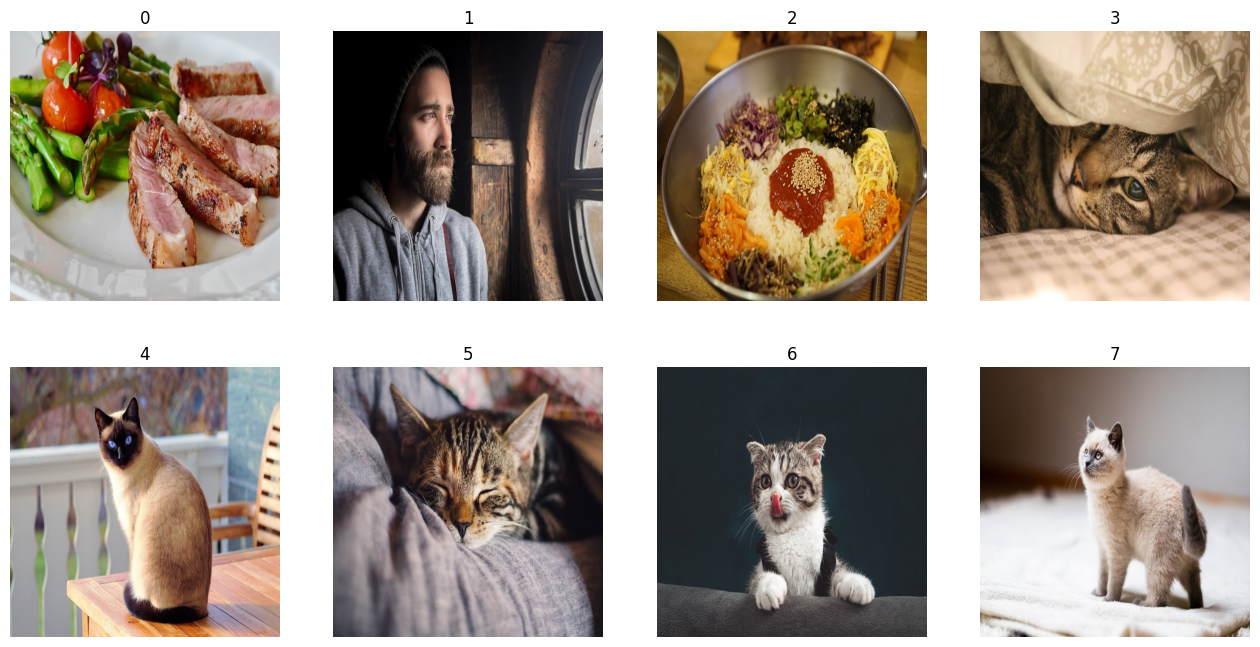

In [48]:
fig = plt.figure(figsize=(16, 8))

for i in range(8):
    fig.add_subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)

plt.show()

## Main Objective

The main objective of this notebook is to identify the best clustering algorithm to correctly cluster the images according to their class. The classes are dogs, cats, family, alone, and food.